In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import torch
import tqdm

sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel
from source.autoencoder import AESurrogateModel
from source.forecast import SEIRForecaster
import source.plots as plots

from sklearn.metrics import r2_score

# to account for updates when files change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
ae_model = AESurrogateModel(population=10**5)

beta = 0.5 # transmission rate
gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
init_inf_frac = 1e-4 # fraction of initially infected

alpha = 0.95
beta = 0.1

initial_params = SEIRParams(0.5, 0.5, gamma, delta, init_inf_frac, tmax=150)
observed_incidence = np.loadtxt('../data/incidence_synthetic_curve.csv'
                               )[:100]
simulation_incidence = ae_model.simulate(alpha, beta, gamma, delta, init_inf_frac)

In [32]:
observed_data = pd.read_csv('../data/incidence_synthetic_curve.csv'
                           ).iloc[:100]
observed_data.columns=['incidence']
observed_data.iloc[:peak_index - 14].shape

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\importlib\__init__.py", line 128, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


(14, 1)

In [23]:
observed_incidence.shape

(100,)

In [35]:
observed_incidence[:peak_index - 14-1]

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
  File "D:\Programs\Anaconda\envs\pymc_torch\Lib\importlib\__init__.py", line 128, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


array([  0.,  77., 133., 209., 248., 316., 362., 407., 457., 543., 662.,
       746., 905.])

In [34]:
%%time
peak_index = observed_incidence.argmax()
onset_period = peak_index - 14 - 1 
peak_period = peak_index - 7 - 1
end_period = peak_index + 7 - 1

for period in [onset_period, peak_period, end_period]:
    forecaster = SEIRForecaster(initial_params=initial_params)

    idata_onset = forecaster_onset.calibrate(ae_model, 
                                             observed_incidence[:100],
                                             period,
                                             epsilon=500)

    idata_onset.sample_stats['beta'] = idata_onset.sample_stats['beta'].astype(str)
    idata_onset.to_netcdf(f"ba_surr_a{alpha}_b{beta}_from_{period}.nc")


Initializing SMC sampler...
Sampling 4 chains in 4 jobs


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\arviz\data\base.py:272: UserWarning: More chains (4) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Sampling: [sim]


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling: [sim]


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling: [sim]


D:\Programs\Anaconda\envs\pymc_torch\Lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

CPU times: total: 11.6 s
Wall time: 1min 49s


In [33]:
idata_onset

Inference data with groups:
	> posterior
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

KeyError: 'var names: "[\'beta\'] are not present" in dataset'

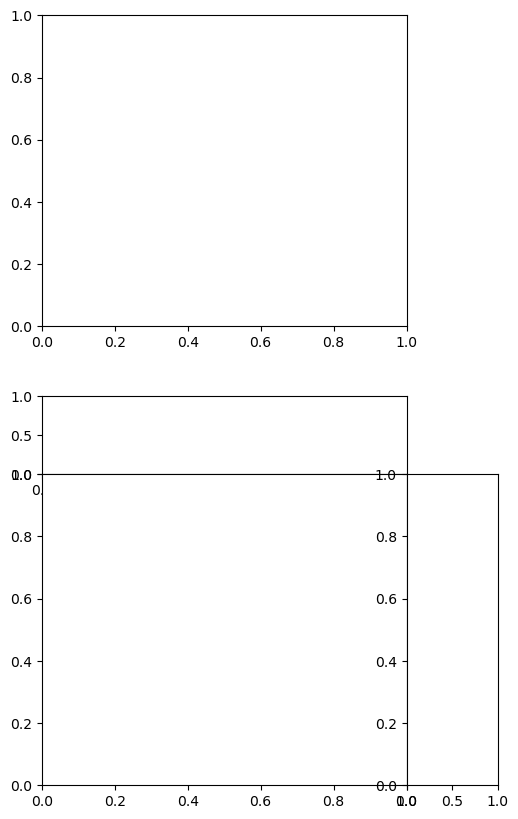

In [16]:
true_alpha = 0.95
true_beta = 0.1
fig = plots.plot_calib_subplots([idata_onset, idata_onset, idata_onset], 
              [observed_incidence[:end] for end in [onset_period, 
                                                    onset_period, 
                                                    onset_period]], 
              true_params_dict={'alpha': true_alpha, 
                                'beta': true_beta},
              full_data=observed_incidence
                               )
#fig.savefig('../figures/ae_ba_network_hdr_subplots.pdf', bbox_inches='tight')
#fig.savefig('../figures/ae_ba_network_hdr_abc_subplots.png', bbox_inches='tight', dpi=600)


In [6]:
fig = create_plots_grid_forecast(array_of_params_dict=[params_dict_onset, params_dict_peak, params_dict_end], 
                           array_of_observed=[observed_incidence[:onset_period], 
                                                       observed_incidence[:peak_period],
                                                       observed_incidence[:end_period]],
                           full_data=observed_incidence)
#fig.savefig('../figures/ae_ba_network_forercast.pdf', bbox_inches='tight')
#fig.savefig('../figures/ae_ba_network_forercast.png', dpi=600, bbox_inches='tight')

NameError: name 'create_plots_grid_forecast' is not defined